In [120]:
import numpy as np
import math
import matplotlib.pyplot as plt

x_train = np.loadtxt("/content/drive/MyDrive/X_train.csv")
x_test = np.loadtxt("/content/drive/MyDrive/X_test.csv")
y_train = np.loadtxt("/content/drive/MyDrive/Y_train.csv")
y_test = np.loadtxt("/content/drive/MyDrive/Y_test.csv")

nnhl = 8 ### Number of neurons in hidden layer
iter = 100; ### No of iterations for weight update
alpha = .001 ### Learning rate
activation_function = 'sigmoid'

nnol = 1 ### Number of neurons in output layer
n = len(y_train) ### Number of training samples

K_big = np.array([nnhl, nnol])

###initialization of weights and biases 

w1 = np.ones((nnhl,2)) # weights of the hidden layer, j=1
b1 = np.ones((nnhl,1));
w2 = np.ones((1,nnhl)) # weights of the output layer, j=2
b2 = 1;

z1 = np.zeros((nnhl,1))

def g(z):
    if activation_function == 'sigmoid':
        a = np.zeros((len(z),1))
        for i in range(len(z)):
            a[i] = 1/(1+math.exp(-z[i]))   
    return a

#### Training and weight update throguh back propagation #####

MSE_array1 = np.zeros((iter,1))
MSE_array2 = np.zeros((iter,1))
for iter_now in range(iter):

  for itertation_of_update in range(iter_now): # loop for number of iterations we want to run for updating weights

      sum_a2_minus_y = 0
      for i in range(n): ##### loop for calculating MSE loss
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_train[i][:,None]) + b1[k]
          a1 = g(z1)                
          # print(a1)
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          sum_a2_minus_y = sum_a2_minus_y + a2 - y_train[i]

          dLw2 = (2/n)*sum_a2_minus_y*a1.T
          dLb2 = (2/n)*sum_a2_minus_y
          
          g_dot =  np.matmul(np.transpose(g(z1)),1-g(z1))
          # g_dot =  (g(z1))*(1-g(z1))
          dLw1 = (2/n)*sum_a2_minus_y* g_dot *  np.matmul(w2.T, x_train[i][:,None].T)
          # dLw1 = (2/n)*sum_a2_minus_y*  np.matmul(w2, g_dot) * x_train[i]

          dLb1 = (2/n)*sum_a2_minus_y* g_dot * w2.T
          
          w1 = w1 - alpha*dLw1
          b1 = b1 - alpha*dLb1
          w2 = w2 - alpha*dLw2
          b2 = b2 - alpha*dLb2


  #### MSE on training data ####
  MSE1 = 0;
  y_pred1 = np.zeros((len(y_train),1))
  for i in range(len(y_train)): 
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_train[i][:,None]) + b1[k]
          a1 = g(z1)                
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          y_pred1[i] = a2
          MSE1 = MSE1 + (y_train[i] - y_pred1[i])**2

  MSE1 = MSE1/len(y_train)
  MSE_array1[iter_now] = MSE1

#### MSE on test data ####
  MSE2 = 0;
  y_pred2 = np.zeros((len(y_test),1))
  for i in range(len(y_test)): 
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_test[i][:,None]) + b1[k]
          a1 = g(z1)                
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          y_pred2[i] = a2
          MSE2 = MSE2 + (y_test[i] - y_pred2[i])**2

  MSE2 = MSE2/len(y_test)
  MSE_array2[iter_now] = MSE2

print('\nW1, Weights of hidden layer:\n',w1) 
print('\nb1, bias of hidden layer:\n',b1)
print('\nW2, Weights of output layer:\n',w2)
print('\nb2, bias of output layer:\n',b2)




W1, Weights of hidden layer:
 [[10.97584293 20.58033361]
 [10.97584293 20.58033361]
 [10.97584293 20.58033361]
 [10.97584293 20.58033361]
 [10.97584293 20.58033361]
 [10.97584293 20.58033361]
 [10.97584293 20.58033361]
 [10.97584293 20.58033361]]

b1, bias of hidden layer:
 [[-32.84549509]
 [-32.84549509]
 [-32.84549509]
 [-32.84549509]
 [-32.84549509]
 [-32.84549509]
 [-32.84549509]
 [-32.84549509]]

W2, Weights of output layer:
 [[35.49136958 35.49136958 35.49136958 35.49136958 35.49136958 35.49136958
  35.49136958 35.49136958]]

b2, bias of output layer:
 [[-26.64948627]]


range(0, 100)

Mean Squared Error on training data :
 [1700.00752447]

Mean Squared Error on test data:
 [2085.01962618]


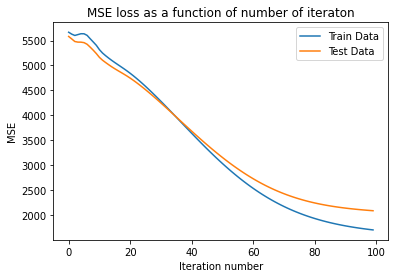

In [110]:

###################################################### Plotting - varrying iteration #################################################################
seq_iter_MSE  = range(0,iter)
print('\nMean Squared Error on training data :\n',MSE1)
print('\nMean Squared Error on test data:\n',MSE2)
plt.figure
plt.plot(seq_iter_MSE,MSE_array1)
plt.plot(seq_iter_MSE,MSE_array2)
plt.title('MSE loss as a function of number of iteraton')
plt.xlabel('Iteration number')
plt.ylabel("MSE")
plt.legend(('Train Data','Test Data'))


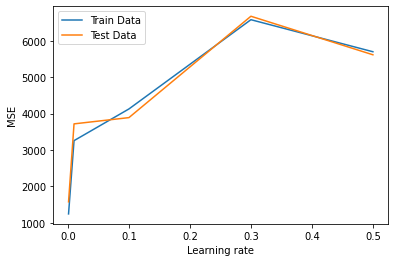

In [68]:
#### I have varied learning rate manually in the first block of code to get MSE loss on training and test data
lr = np.array([.001, .01, .1, .3, .5, .8])
MSEtrain = np.array([1241.29, 3256.91, 4128.52, 6583.62, 5702.20, 13584143.65])
MSEtest = np.array([1574.40 ,3718.22, 3890.20, 6678.61 ,5618.67, 13612060.59])
plt.plot(lr[0:5],MSEtrain[0:5])
plt.plot(lr[0:5],MSEtest[0:5])
plt.xlabel('Learning rate')
plt.ylabel("MSE")
plt.legend(('Train Data','Test Data'))

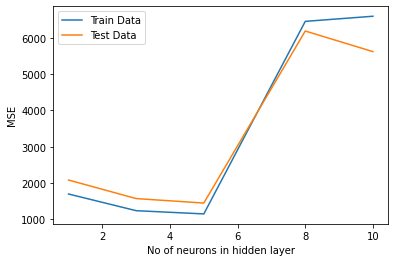

In [80]:
#### I have varied hidden layer neuron number manually in the first block of code to get MSE loss on training and test data
nnhl1 = np.array([1,3,5,8,10])
MSEtrain = np.array([1700, 1241.29, 1152.41, 6451.3, 6592.1  ])
MSEtest = np.array([2085.01 ,1574.4, 1451.24, 6185.53 ,5618.67, 6301.8])
plt.plot(nnhl1,MSEtrain[0:5])
plt.plot(nnhl1,MSEtest[0:5])
plt.xlabel('No of neurons in hidden layer')
plt.ylabel("MSE")
plt.legend(('Train Data','Test Data'))

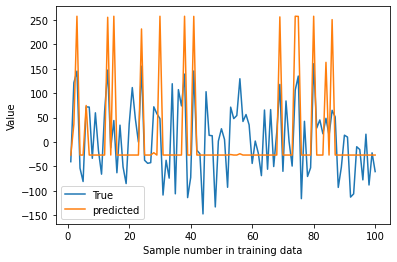

In [121]:
#training data
ns = np.arange(1,101,1,dtype=int)
plt.plot(ns,y_train)
plt.plot(ns,y_pred1)
plt.xlabel('Sample number in training data')
plt.ylabel("Value")
plt.legend(('True','predicted'))


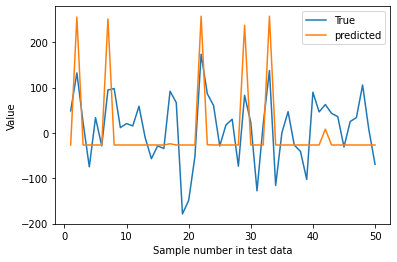

In [122]:
#test data
ns = np.arange(1,51,1,dtype=int)
plt.plot(ns,y_test)
plt.plot(ns,y_pred2)
plt.xlabel('Sample number in test data')
plt.ylabel("Value")
plt.legend(('True','predicted'))

In [135]:

###################################################### TANH activation func #################################################################

no_of_nurons_hidden_layer = 3 ########################## No of nurons (in hidden layer)
no_of_iterations_for_weight_update = 100; ############## No of iterations for weight update
learning_rate = 0.001
 #################################### Learning rate
select_activation_function = 'tanh'

alpha = learning_rate

no_of_nurons_output_layer = 1
n = len(y_train) ################################### no of training samples

K_big = np.array([no_of_nurons_hidden_layer, no_of_nurons_output_layer])

w1 = np.ones((no_of_nurons_hidden_layer,2)) # weights of the hidden layer, j=1
b1 = np.ones((no_of_nurons_hidden_layer,1));
w2 = np.ones((1,no_of_nurons_hidden_layer)) # weights of the output layer, j=2
b2 = 1;

z1 = np.zeros((no_of_nurons_hidden_layer,1))

def g(z):
    if select_activation_function == 'sigmoid':
        a = np.zeros((len(z),1))
        for i in range(len(z)):
            a[i] = 1/(1+math.exp(-z[i]))   

    if select_activation_function == 'tanh':
        a = np.zeros((len(z),1))
        for i in range(len(z)):
            a[i] =  (math.exp(z[i])-math.exp(-z[i]))/(math.exp(z[i])+math.exp(-z[i]))


    return a

############################################################### Training and weight update throguh back propagation ###################################################

MSE1_array = np.zeros((no_of_iterations_for_weight_update,1))
MSE2_array = np.zeros((no_of_iterations_for_weight_update,1))
for iter_now in range(no_of_iterations_for_weight_update):

  for itertation_of_update in range(iter_now): # loop for how many iterations we wanna run for updating weights

      sum_a2_minus_y = 0
      for i in range(n): ##### loop for consiering all the samples to calculate mse loss
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_train[i][:,None]) + b1[k]
          a1 = g(z1)                
          # print(a1)
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          sum_a2_minus_y = sum_a2_minus_y + a2 - y_train[i]

          dLw2 = (2/n)*sum_a2_minus_y*a1.T
          dLb2 = (2/n)*sum_a2_minus_y
          
          g_dot =  1 - (g(z1)**2)
          # g_dot =  (g(z1))*(1-g(z1))
          dLw1 = (2/n)*sum_a2_minus_y* g_dot *  np.matmul(w2.T, x_train[i][:,None].T)
          # dLw1 = (2/n)*sum_a2_minus_y*  np.matmul(w2, g_dot) * x_train[i]

          dLb1 = (2/n)*sum_a2_minus_y* g_dot * w2.T
          
          w1 = w1 - alpha*dLw1
          b1 = b1 - alpha*dLb1
          w2 = w2 - alpha*dLw2
          b2 = b2 - alpha*dLb2


  ###################################################### Prediction ##########################################################
  MSE1 = 0;
  y_pred1 = np.zeros((len(y_train),1))
  for i in range(len(y_train)): ############### loop for consiering all the samples of test data
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_train[i][:,None]) + b1[k]
          a1 = g(z1)                
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          y_pred1[i] = a2
          MSE1 = MSE1 + (y_train[i] - y_pred1[i])**2

  MSE1 = MSE1/len(y_train)
  MSE1_array[iter_now] = MSE1
  
  
  MSE2 = 0;
  y_pred2 = np.zeros((len(y_test),1))
  for i in range(len(y_test)): ############### loop for consiering all the samples of test data
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_test[i][:,None]) + b1[k]
          a1 = g(z1)                
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          y_pred2[i] = a2
          MSE2 = MSE2 + (y_test[i] - y_pred2[i])**2

  MSE2 = MSE2/len(y_test)
  MSE2_array[iter_now] = MSE2


print('\nW1, Weights of hidden layer:\n',w1) 
print('\nb1, bias of hidden layer:\n',b1)
print('\nW2, Weights of output layer:\n',w2)
print('\nb2, bias of output layer:\n',b2)




W1, Weights of hidden layer:
 [[0.21708398 1.75626482]
 [0.21708398 1.75626482]
 [0.21708398 1.75626482]]

b1, bias of hidden layer:
 [[-1.05380794]
 [-1.05380794]
 [-1.05380794]]

W2, Weights of output layer:
 [[21.65394196 21.65394196 21.65394196]]

b2, bias of output layer:
 [[15.95916251]]



Mean Squared Error on training data :
 [1339.63417987]

Mean Squared Error on test data:
 [1728.92687882]


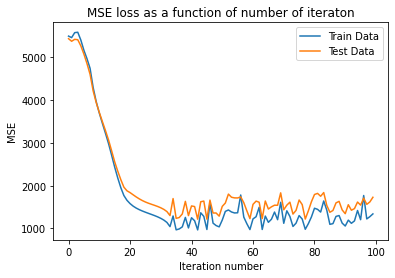

In [136]:

###################################################### Plotting - varrying iteration #################################################################
seq_iter_MSE  = range(0,no_of_iterations_for_weight_update)
print('\nMean Squared Error on training data :\n',MSE1)
print('\nMean Squared Error on test data:\n',MSE2)
plt.figure
plt.plot(seq_iter_MSE,MSE1_array)
plt.plot(seq_iter_MSE,MSE2_array)
plt.title('MSE loss as a function of number of iteraton')
plt.xlabel('Iteration number')
plt.ylabel("MSE")
plt.legend(('Train Data','Test Data'))


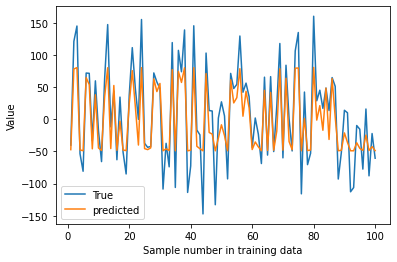

In [131]:
#training data
ns = np.arange(1,101,1,dtype=int)
plt.plot(ns,y_train)
plt.plot(ns,y_pred1)
plt.xlabel('Sample number in training data')
plt.ylabel("Value")
plt.legend(('True','predicted'))


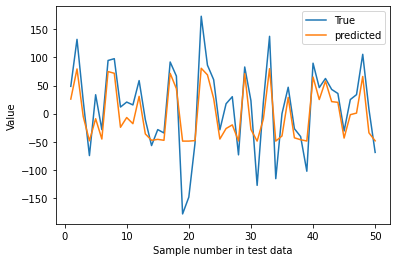

In [132]:
#test data
ns = np.arange(1,51,1,dtype=int)
plt.plot(ns,y_test)
plt.plot(ns,y_pred2)
plt.xlabel('Sample number in test data')
plt.ylabel("Value")
plt.legend(('True','predicted'))

In [139]:

###################################################### Linear activation func #################################################################

no_of_nurons_hidden_layer = 3 ########################## No of nurons (in hidden layer)
no_of_iterations_for_weight_update = 100; ############## No of iterations for weight update
learning_rate = 0.001
 #################################### Learning rate
select_activation_function = 'linear'

alpha = learning_rate

no_of_nurons_output_layer = 1
n = len(y_train) ################################### no of training samples

K_big = np.array([no_of_nurons_hidden_layer, no_of_nurons_output_layer])

w1 = np.ones((no_of_nurons_hidden_layer,2)) # weights of the hidden layer, j=1
b1 = np.ones((no_of_nurons_hidden_layer,1));
w2 = np.ones((1,no_of_nurons_hidden_layer)) # weights of the output layer, j=2
b2 = 1;

z1 = np.zeros((no_of_nurons_hidden_layer,1))

def g(z):
    if select_activation_function == 'sigmoid':
        a = np.zeros((len(z),1))
        for i in range(len(z)):
            a[i] = 1/(1+math.exp(-z[i]))   

    if select_activation_function == 'tanh':
        a = np.zeros((len(z),1))
        for i in range(len(z)):
            a[i] =  (math.exp(z[i])-math.exp(-z[i]))/(math.exp(z[i])+math.exp(-z[i]))

    if select_activation_function == 'linear':
        a = np.zeros((len(z),1))
        for i in range(len(z)):
            a[i] =  z[i]

    return a

############################################################### Training and weight update throguh back propagation ###################################################

MSE_array1 = np.zeros((no_of_iterations_for_weight_update,1))
MSE_array2 = np.zeros((no_of_iterations_for_weight_update,1))
for iter_now in range(no_of_iterations_for_weight_update):

  for itertation_of_update in range(iter_now): # loop for how many iterations we wanna run for updating weights

      sum_a2_minus_y = 0
      for i in range(n): ##### loop for consiering all the samples to calculate mse loss
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_train[i][:,None]) + b1[k]
          a1 = g(z1)                
          # print(a1)
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          sum_a2_minus_y = sum_a2_minus_y + a2 - y_train[i]

          dLw2 = (2/n)*sum_a2_minus_y*a1.T
          dLb2 = (2/n)*sum_a2_minus_y
          
          g_dot =  1
          # g_dot =  (g(z1))*(1-g(z1))
          dLw1 = (2/n)*sum_a2_minus_y* g_dot *  np.matmul(w2.T, x_train[i][:,None].T)
          # dLw1 = (2/n)*sum_a2_minus_y*  np.matmul(w2, g_dot) * x_train[i]

          dLb1 = (2/n)*sum_a2_minus_y* g_dot * w2.T
          
          w1 = w1 - alpha*dLw1
          b1 = b1 - alpha*dLb1
          w2 = w2 - alpha*dLw2
          b2 = b2 - alpha*dLb2


  ###################################################### Prediction ##########################################################
  MSE1 = 0;
  y_pred1 = np.zeros((len(y_train),1))
  for i in range(len(y_train)): ############### loop for consiering all the samples of test data
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_train[i][:,None]) + b1[k]
          a1 = g(z1)                
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          y_pred1[i] = a2
          MSE = MSE + (y_train[i] - y_pred1[i])**2

  MSE1 = MSE1/len(y_train)
  MSE_array1[iter_now] = MSE1

  MSE2 = 0;
  y_pred2 = np.zeros((len(y_test),1))
  for i in range(len(y_test)): ############### loop for consiering all the samples of test data
          
          for k in range(K_big[0]):
              z1[k] = np.matmul(w1[k],x_test[i][:,None]) + b1[k]
          a1 = g(z1)                
          z2 = np.matmul(w2,a1) + b2
          a2 = z2
          y_pred2[i] = a2
          MSE2 = MSE2 + (y_test[i] - y_pred2[i])**2

  MSE2 = MSE2/len(y_test)
  MSE_array2[iter_now] = MSE2
print('\nW1, Weights of hidden layer:\n',w1) 
print('\nb1, bias of hidden layer:\n',b1)
print('\nW2, Weights of output layer:\n',w2)
print('\nb2, bias of output layer:\n',b2)




W1, Weights of hidden layer:
 [[0.0074032  4.93089973]
 [0.0074032  4.93089973]
 [0.0074032  4.93089973]]

b1, bias of hidden layer:
 [[-0.06590686]
 [-0.06590686]
 [-0.06590686]]

W2, Weights of output layer:
 [[4.70092782 4.70092782 4.70092782]]

b2, bias of output layer:
 [[0.92947022]]



Mean Squared Error on training data :
 0.0

Mean Squared Error on test data:
 [7.11397765e-26]


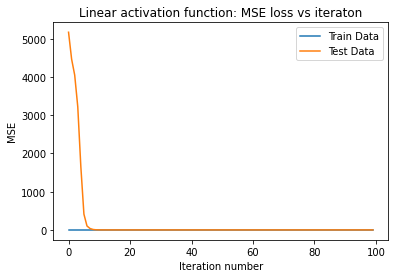

In [140]:

###################################################### Plotting - varrying iteration #################################################################

###################################################### Plotting - varrying iteration #################################################################
seq_iter_MSE  = range(0,no_of_iterations_for_weight_update)
print('\nMean Squared Error on training data :\n',MSE1)
print('\nMean Squared Error on test data:\n',MSE2)
plt.figure
plt.plot(seq_iter_MSE,MSE_array1)
plt.plot(seq_iter_MSE,MSE_array2)
plt.title('Linear activation function: MSE loss vs iteraton')
plt.xlabel('Iteration number')
plt.ylabel("MSE")
plt.legend(('Train Data','Test Data'))


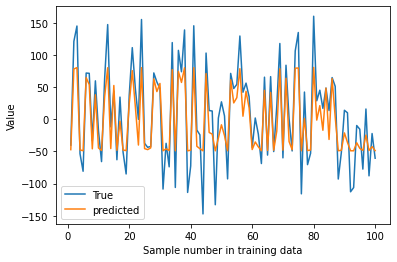

In [137]:
#training data
ns = np.arange(1,101,1,dtype=int)
plt.plot(ns,y_train)
plt.plot(ns,y_pred1)
plt.xlabel('Sample number in training data')
plt.ylabel("Value")
plt.legend(('True','predicted'))

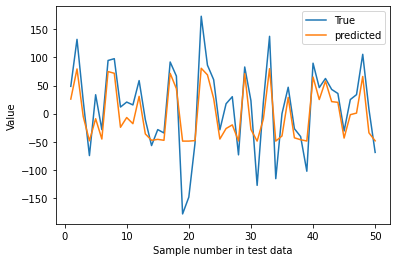

In [138]:
#test data
ns = np.arange(1,51,1,dtype=int)
plt.plot(ns,y_test)
plt.plot(ns,y_pred2)
plt.xlabel('Sample number in test data')
plt.ylabel("Value")
plt.legend(('True','predicted'))